# Описание задачи 

Сайт тестирует изменение в дизайне с помощью AB теста. А - контрольная группа, В - тестовая. 

Цель: проанализировать изменение метрик и их значимость

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ab_test_results_aggregated_views_clicks_2.csv")

In [3]:
#Добавим метрику ctr
df['ctr'] = df['clicks'] / df['views']
df.head(5)

,user_id,group,views,clicks,ctr
0,1,control,10.0,0.0,0.0
1,2,control,1.0,0.0,0.0
2,3,control,1.0,0.0,0.0
3,4,control,2.0,0.0,0.0
4,5,control,3.0,0.0,0.0


In [4]:
df_control, df_test = df[df['group'] == 'control'].drop('group', axis=1), df[df['group'] == 'test'].drop('group', axis=1)

# Анализ

## Нормальность распределения

Посмотрим на распределения метрик

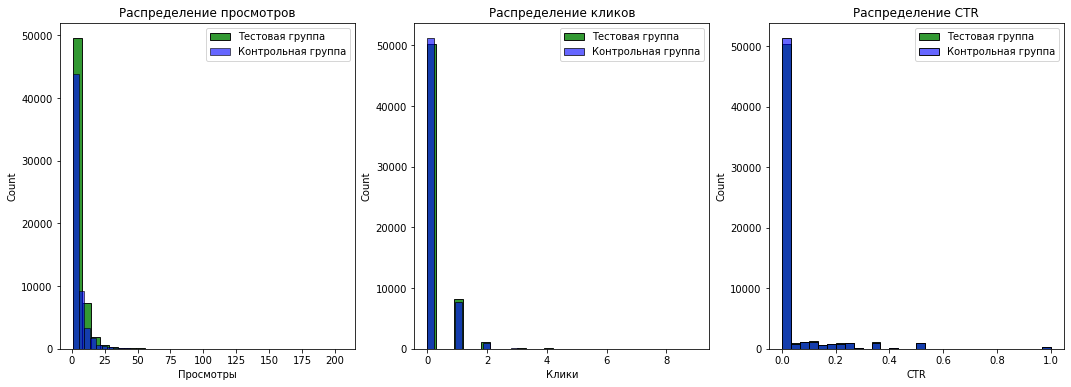

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data = df_test, x='views', bins=30,alpha=0.8, color='green', ax=axes[0], label='Тестовая группа')
sns.histplot(data = df_control, x='views', bins=30,alpha=0.6, color='blue', ax=axes[0], label='Контрольная группа')
axes[0].set_xlabel('Просмотры')
axes[0].set_title('Распределение просмотров')
axes[0].legend()

sns.histplot(data = df_test, x='clicks', bins=30,alpha=0.8, color='green', ax=axes[1], label='Тестовая группа')
sns.histplot(data = df_control, x='clicks', bins=30,alpha=0.6, color='blue', ax=axes[1], label='Контрольная группа')
axes[1].set_xlabel('Клики')
axes[1].set_title('Распределение кликов')
axes[1].legend()

sns.histplot(data = df_test, x='ctr', bins=30,alpha=0.8, color='green', ax=axes[2], label='Тестовая группа')
sns.histplot(data = df_control, x='ctr', bins=30,alpha=0.6, color='blue', ax=axes[2], label='Контрольная группа')
axes[2].set_xlabel('CTR')
axes[2].set_title('Распределение CTR')
axes[2].legend()

plt.show()

Невооруженным глазом видно, что распределения далеки от нормальных. Это можно также подтвердить с помощью графика Q-Q Plot
и Теста Д Агостина(он более эффективен при больших размерах выборки(n > 2000), чем тест Шапиро-Уилка)

In [6]:
print("Тест Д'Агостина на нормальность распределения(α=0.05):")
z, p_val = stats.normaltest(df_control['views'])
print()
print("Просмотров в контрольной группе")
print(f"Значение - {z:.3f}, p-value - {p_val:.3f}")
print(f"Нормальное: {'НЕТ' if p_val < 0.05 else 'ДА'}")
z, p_val = stats.normaltest(df_control['clicks'])
print()
print("Кликов в контрольной группе")
print(f"Значение - {z:.3f}, p-value - {p_val:.3f}")
print(f"Нормальное: {'НЕТ' if p_val < 0.05 else 'ДА'}")
z, p_val = stats.normaltest(df_control['ctr'])
print()
print("CTR в контрольной группе")
print(f"Значение - {z:.3f}, p-value - {p_val:.3f}")
print(f"Нормальное: {'НЕТ' if p_val < 0.05 else 'ДА'}")
print()
z, p_val = stats.normaltest(df_test['views'])
print()
print("Просмотров в тестовой группе")
print(f"Значение - {z:.3f}, p-value - {p_val:.3f}")
print(f"Нормальное: {'НЕТ' if p_val < 0.05 else 'ДА'}")
z, p_val = stats.normaltest(df_test['clicks'])
print()
print("Кликов в тестовой группе")
print(f"Значение - {z:.3f}, p-value - {p_val:.3f}")
print(f"Нормальное: {'НЕТ' if p_val < 0.05 else 'ДА'}")
z, p_val = stats.normaltest(df_test['ctr'])
print()
print("CTR в тестовой группе")
print(f"Значение - {z:.3f}, p-value - {p_val:.3f}")
print(f"Нормальное: {'НЕТ' if p_val < 0.05 else 'ДА'}")

Тест Д'Агостина на нормальность распределения(α=0.05):

Просмотров в контрольной группе
Значение - 62633.913, p-value - 0.000
Нормальное: НЕТ

Кликов в контрольной группе
Значение - 43448.317, p-value - 0.000
Нормальное: НЕТ

CTR в контрольной группе
Значение - 59099.578, p-value - 0.000
Нормальное: НЕТ


Просмотров в тестовой группе
Значение - 75352.849, p-value - 0.000
Нормальное: НЕТ

Кликов в тестовой группе
Значение - 43299.808, p-value - 0.000
Нормальное: НЕТ

CTR в тестовой группе
Значение - 56469.174, p-value - 0.000
Нормальное: НЕТ


Графики Q-Q Plot:


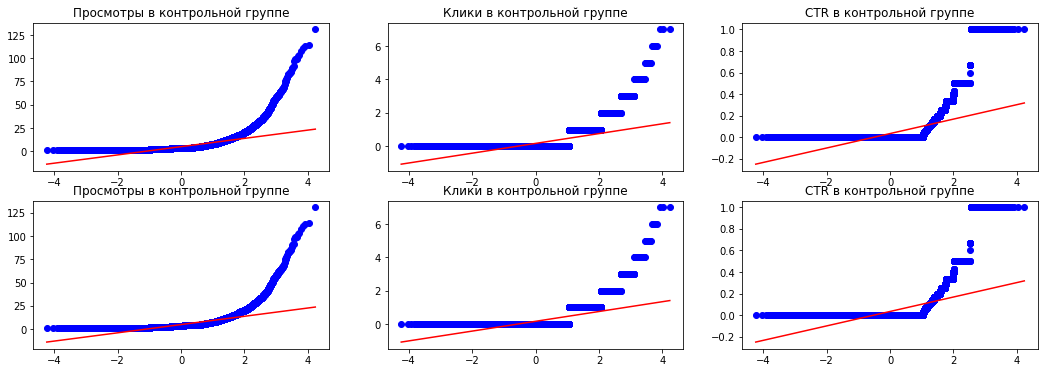

In [7]:
print("Графики Q-Q Plot:")
fig, axes = plt.subplots(2, 3, figsize=(18, 6))
stats.probplot(df_control['views'], dist="norm", plot=axes[0, 0], )
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')
axes[0, 0].set_title('Просмотры в контрольной группе')
stats.probplot(df_control['clicks'], dist="norm", plot=axes[0, 1], )
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Клики в контрольной группе')
stats.probplot(df_control['ctr'], dist="norm", plot=axes[0, 2], )
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')
axes[0, 2].set_title('CTR в контрольной группе')
stats.probplot(df_control['views'], dist="norm", plot=axes[1, 0], )
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].set_title('Просмотры в контрольной группе')
stats.probplot(df_control['clicks'], dist="norm", plot=axes[1, 1], )
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Клики в контрольной группе')
stats.probplot(df_control['ctr'], dist="norm", plot=axes[1, 2], )
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('')
axes[1, 2].set_title('CTR в контрольной группе')

plt.show()

Во всех случаях распределение значений отличается от нормльного.

Так как распределение отличается от нормального, то нельзя использовать параметрические методы(например t Стьюдента). 

## Непараметрический тест

Воспользуемся тестом Манна-Уитни(α=0.05).

In [8]:
statistic, p_val = stats.mannwhitneyu(df_control['views'], df_test['views'])
print("Для просмотров")
print(f"Значение - {statistic}, p-value - {p_val:.3f}")
print(f"Значимое различие: {'ДА' if p_val < 0.05 else 'НЕТ'}")
statistic, p_val = stats.mannwhitneyu(df_control['clicks'], df_test['clicks'])
print("Для просмотров")
print(f"Значение - {statistic}, p-value - {p_val:.3f}")
print(f"Значимое различие: {'ДА' if p_val < 0.05 else 'НЕТ'}")
statistic, p_val = stats.mannwhitneyu(df_control['ctr'], df_test['ctr'])
print("Для просмотров")
print(f"Значение - {statistic}, p-value - {p_val:.3f}")
print(f"Значимое различие: {'ДА' if p_val < 0.05 else 'НЕТ'}")

Для просмотров
Значение - 1786162565.5, p-value - 0.010
Значимое различие: ДА
Для просмотров
Значение - 1772621998.0, p-value - 0.000
Значимое различие: ДА
Для просмотров
Значение - 1773003355.0, p-value - 0.000
Значимое различие: ДА


Выходит, что для всех метрик у нас значимое различие, а значит изменение в дизайне действительно имеет результат, 
остается только понять, положительный он или отрицательный. Для этого можно сравнить средние и медианные значения по каждой метрике.

In [9]:
print(f"По просмотрам:")
print(f"Медиана в контрольной группе: {df_control['views'].median()} в тестовой: {df_test['views'].median()}")
print(f"Среднее в контрольной группе: {df_control['views'].mean():.3f} в тестовой: {df_test['views'].mean():.3f} (+{df_test['views'].mean()/df_control['views'].mean()*100-100:.2f}%)")
print(f"По кликам:")
print(f"Медиана в контрольной группе: {df_control['clicks'].median()} в тестовой: {df_test['clicks'].median()}")
print(f"Среднее в контрольной группе: {df_control['clicks'].mean():.3f} в тестовой: {df_test['clicks'].mean():.3f} (+{df_test['clicks'].mean()/df_control['clicks'].mean()*100-100:.2f}%)")
print(f"По CTR:")
print(f"Медиана в контрольной группе: {df_control['ctr'].median()} в тестовой: {df_test['ctr'].median()}")
print(f"Среднее в контрольной группе: {df_control['ctr'].mean():.3f} в тестовой: {df_test['ctr'].mean():.3f} (+{df_test['ctr'].mean()/df_control['ctr'].mean()*100-100:.2f}%)")

По просмотрам:
Медиана в контрольной группе: 3.0 в тестовой: 3.0
Среднее в контрольной группе: 4.952 в тестовой: 5.030 (+1.56%)
По кликам:
Медиана в контрольной группе: 0.0 в тестовой: 0.0
Среднее в контрольной группе: 0.172 в тестовой: 0.194 (+12.78%)
По CTR:
Медиана в контрольной группе: 0.0 в тестовой: 0.0
Среднее в контрольной группе: 0.035 в тестовой: 0.039 (+11.52%)


Можем заметить, что изменение в дизайне положительно повлияло на все метрики

## Bootstrap

Проведем сэмплирование с возвращением и поиск среднего для каждой метрики N = 10000 раз у обоих выборок.

In [10]:
N = 10000
control_views_mean = []
control_clicks_mean = []
control_ctr_mean = []
test_views_mean = []
test_clicks_mean = []
test_ctr_mean = []
for i in range (0, N):
    control_sample = df_control.sample(n=df_control.size, replace="True")
    control_views_mean.append(control_sample['views'].mean())
    control_clicks_mean.append(control_sample['clicks'].mean())
    control_ctr_mean.append(control_sample['ctr'].mean())
    test_sample = df_test.sample(n=df_test.size, replace="True")
    test_views_mean.append(test_sample['views'].mean())
    test_clicks_mean.append(test_sample['clicks'].mean())
    test_ctr_mean.append(test_sample['ctr'].mean())

Найдем N разниц test_mean - control_mean

In [11]:
views_diffs = [0] * N
clicks_diffs = [0] * N
ctr_diffs = [0] * N
for i in range (0, N):
    views_diffs[i] = test_views_mean[i] - control_views_mean[i] 
    clicks_diffs[i] = test_clicks_mean[i] - control_clicks_mean[i]
    ctr_diffs[i] = test_ctr_mean[i] - control_ctr_mean[i]

Посмортим на распределения разницы средних для выборок

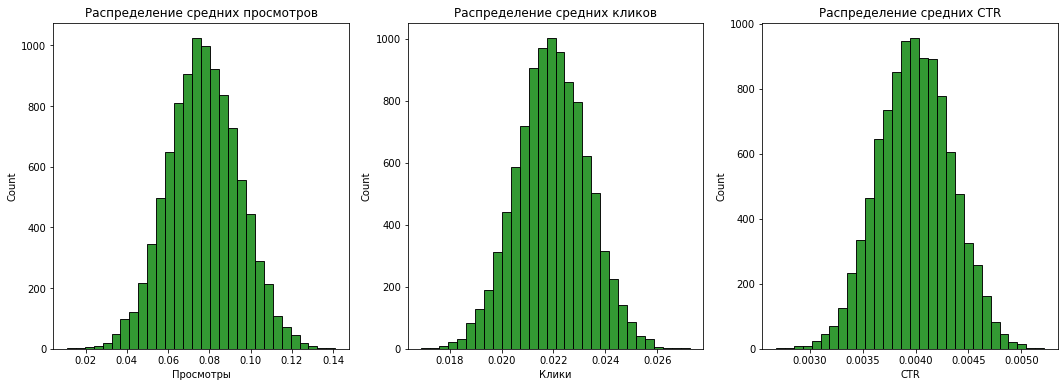

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data = views_diffs, bins=30,alpha=0.8, color='green', ax=axes[0])
axes[0].set_xlabel('Просмотры')
axes[0].set_title('Распределение средних просмотров')

sns.histplot(data = clicks_diffs, bins=30,alpha=0.8, color='green', ax=axes[1])
axes[1].set_xlabel('Клики')
axes[1].set_title('Распределение средних кликов')

sns.histplot(data = ctr_diffs, bins=30,alpha=0.8, color='green', ax=axes[2])
axes[2].set_xlabel('CTR')
axes[2].set_title('Распределение средних CTR')


plt.show()

Построим 95% доверительные интервалы

In [13]:
views_sorted = sorted(views_diffs)
clicks_sorted = sorted(clicks_diffs)
ctr_sorted = sorted(ctr_diffs)

print(f"95% доверительный интервал для просмотров: [{views_sorted[int(N*0.025)]:.4f} ; {views_sorted[int(N*0.975)]:.4f}]")
print(f"95% доверительный интервал для кликов: [{clicks_sorted[int(N*0.025)]:.4f} ; {clicks_sorted[int(N*0.975)]:.4f}]")
print(f"95% доверительный интервал для ctr: [{ctr_sorted[int(N*0.025)]:.4f} ; {ctr_sorted[int(N*0.975)]:.4f}]")

95% доверительный интервал для просмотров: [0.0436 ; 0.1109]
95% доверительный интервал для кликов: [0.0193 ; 0.0246]
95% доверительный интервал для ctr: [0.0033 ; 0.0047]


Все интервалы не содержат 0. Значит эффект статистически значим

# Итог

По итогам проведенного анализа можно сказать, что все ключевые метрики увеличили свои значения, и для всех метрик эффект является статистически значимым. Сайту стоит ввести тестируемое изменение